In [106]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace

### Amônia - Isotérmico

In [107]:
R = 8.314  # J/molK
Tc = 405.7  # K
Pc = 112.8*(10**5)  # Pa
T = 373.15 # K
Tr = T/Tc
alfa = 1/(math.sqrt(Tr))
a = (0.42748*alfa*(R**2)*(Tc**2))/Pc  # Pa*(m^3/mol)^2
b = .08664*R*Tc/Pc  # m^3/mol

pressures = linspace(10**5, 50*10**5, 10000)
v_values = []

### Functions

In [108]:
def initial_value(P) -> int or float:
    return R*T/P


def get_value(P, v) -> int or float:
    return (initial_value(P) + b - ((a*(v-b))/(P*v*(v+b))))

### Loop

In [109]:
for P in pressures:
    v = []  # Variavel
    g = []  # Função

    v.append(initial_value(P))
    i = 0
    error = 10  # Valor alto aleatório para setar erro inicial
    tolerance = 10**-100
    safety_loops = 1000

    while error > tolerance and i < safety_loops:

        g.append(get_value(P, v[i]))
        v.append(g[i])
        error = abs(v[i+1] - v[i])
        i += 1

    v_values.append(v[len(v)-1])

### Final Results

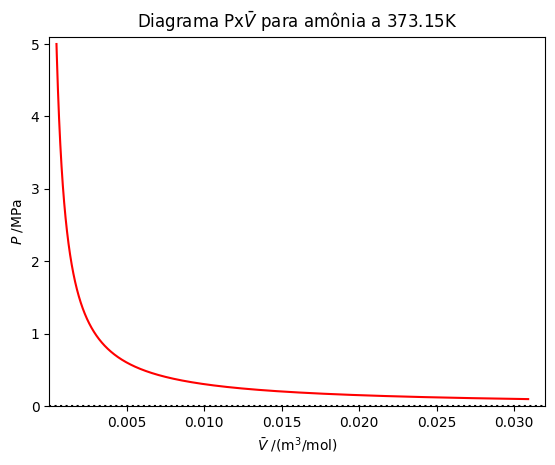

O trabalho realizado pelo compressor foi: -12205.58J/mol


In [110]:
vf = v_values[len(v_values) - 1]
vi = v_values[0]
pressures = pressures/1000000

W = (R*T*math.log((vf - b)/(vi - b))) + \
    ((a/b)*math.log((vi*(vf+b))/(vf*(vi+b))))  # J/mol
Q = 0

# plt.scatter(v_values,pressures)
plt.plot(v_values,pressures, 'r')
plt.ylim(0,pressures[len(pressures)-1]+.1)
plt.xlim(0.000005,0.032)
plt.axhline(0,ls=':',c='k')#show
plt.title(r'Diagrama Px$\bar V$ para amônia a 373.15K')
plt.xlabel(r'$\bar V$ /(m$^3$/mol)')
plt.ylabel(r'$P$ /MPa')
plt.show()

print(f'O trabalho realizado pelo compressor foi: {W:.2f}J/mol')